<h1> Week 5. Convolutional neural networks (CNN) </h1>

<h3>Import Pytorch libraries </h3>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

<h3> Load the CIFAR-10 dataset </h3>

In [2]:
#from ipywidgets import IProgress
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
 
batch_size = 256
 
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
 
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
 
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


<h3>Plot one batch of 32x32 images of the CIFAR-10 dataset</h3>

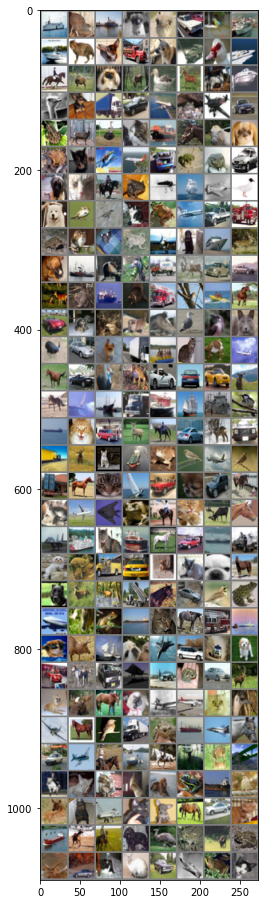

 ship  bird  ship   dog  bird   car  bird  ship  ship   cat   dog truck   dog truck  bird  ship horse  deer   dog  deer  bird horse horse  ship  bird   dog truck   car plane  frog plane   car  frog  deer  bird   cat  ship horse horse   dog  frog   cat plane plane   car  frog  frog   car   dog   cat horse  frog plane  ship plane  bird   dog  bird  bird   cat  frog plane   car truck  frog   cat   dog  frog plane   dog  ship  deer   dog  ship   cat  bird truck  deer   car   car  deer  frog  ship   cat truck  bird  ship horse   car   dog  deer   cat horse  bird  bird   cat  bird   car   dog truck  ship   cat   dog plane horse   car  bird  frog   car   car   car  deer horse  ship  ship truck  ship  ship  ship  bird  ship   cat   car  deer horse   car  deer   car truck  deer   cat  ship  frog  bird plane  bird truck horse   cat  ship   car   dog   car horse   cat plane plane  frog horse   cat  deer horse plane  ship   cat  ship horse   car  ship truck   dog  deer truck   car   dog   cat   do

In [3]:
import matplotlib.pyplot as plt
import numpy as np


# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
f = plt.figure (figsize = (16,16))
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

<h1> Simple CNN architecture </h1>

<h3> Building a simple CNN architecture for the classifying images from the CIFAR-10</h3>

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x.to(device)
        return x


net = Net()

In [5]:
!pip install torchviz
!pip install graphviz

<h3> Show a computation graph 

In [6]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\'
# print(os.environ["PATH"])
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

C:\Users\user\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


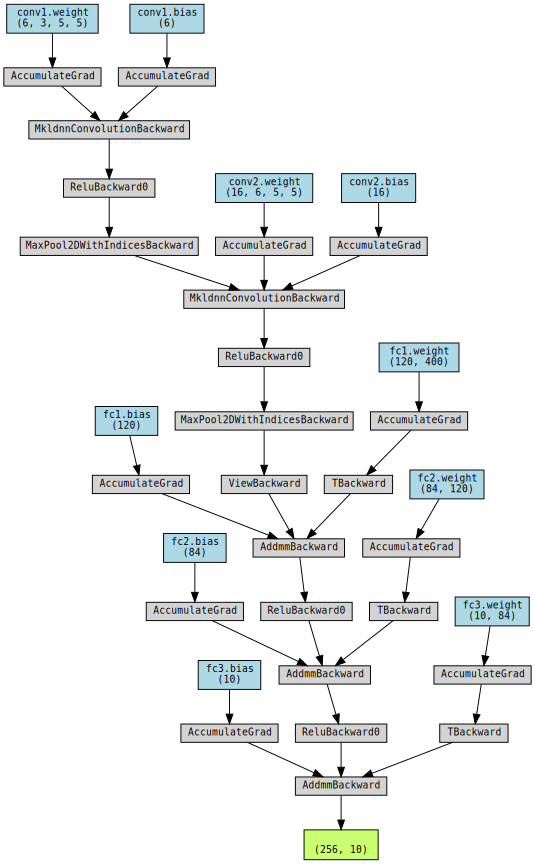

In [7]:
batch = next(iter(trainloader))
yhat = net(batch[0])
from torchviz import make_dot
make_dot(yhat, params=dict(list(net.named_parameters())))

<h3> Run on a CPU </h3>

In [8]:
import torch.optim as optim
device = 'cpu'
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
print (device)
net = net.to(device)

cpu


<h3> Run on  a single GPU </h3>

In [9]:
import torch.optim as optim
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
net.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
print (device)

cuda:0


<h3> Run parallel on Multiple GPUs </h3>

In [10]:
import torch.optim as optim
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
if torch.cuda.device_count() > 1:
    print("Let's use", torch.cuda.device_count(), "GPUs!")
    net = nn.DataParallel(net, device_ids = [0,1])
net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
print (device)

cuda:0


In [11]:
# Some additional information about hardware
print('torch.cuda.is_available():', torch.cuda.is_available())
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('torch.device():', device)
current_device = torch.cuda.current_device()
print('torch.cuda.current_device():', current_device)
print('torch.cuda.device_count():', torch.cuda.device_count())
print('torch.cuda.get_device_name(current_device):', torch.cuda.get_device_name(current_device))

torch.cuda.is_available(): True
torch.device(): cuda:0
torch.cuda.current_device(): 0
torch.cuda.device_count(): 1
torch.cuda.get_device_name(current_device): GeForce GTX 1650


<h3> CNN training on a CIFAR-10 </h3>

In [16]:
import time

start = time.time()

for epoch in range(15):  # loop over the dataset multiple times
# for epoch in range(40):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to (device)
        labels = labels.to (device)
        print(inputs, labels)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        print('=======', outputs.shape, labels.shape, '======')
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
end = time.time()
print(end - start)

tensor([[[[ 0.8902,  0.8824,  0.8824,  ...,  0.8745,  0.8745,  0.8745],
          [ 0.9059,  0.8980,  0.8980,  ...,  0.8902,  0.8902,  0.8902],
          [ 0.9137,  0.8980,  0.8980,  ...,  0.8902,  0.8902,  0.8902],
          ...,
          [ 0.9137,  0.8980,  0.8980,  ...,  0.8980,  0.8980,  0.8980],
          [ 0.9216,  0.8980,  0.9059,  ...,  0.8980,  0.8980,  0.8980],
          [ 0.9216,  0.8980,  0.9059,  ...,  0.8980,  0.8980,  0.8980]],

         [[ 0.8824,  0.8745,  0.8745,  ...,  0.8667,  0.8667,  0.8667],
          [ 0.8980,  0.8902,  0.8902,  ...,  0.8824,  0.8824,  0.8824],
          [ 0.9059,  0.8902,  0.8902,  ...,  0.8824,  0.8824,  0.8824],
          ...,
          [ 0.9059,  0.8902,  0.8902,  ...,  0.8902,  0.8902,  0.8902],
          [ 0.9059,  0.8824,  0.8902,  ...,  0.8902,  0.8902,  0.8902],
          [ 0.8902,  0.8667,  0.8824,  ...,  0.8902,  0.8902,  0.8902]],

         [[ 0.8510,  0.8431,  0.8431,  ...,  0.8353,  0.8353,  0.8353],
          [ 0.8667,  0.8588,  

tensor([[[[ 0.9686,  0.7882,  0.8196,  ...,  0.6314,  0.8745,  0.8824],
          [ 0.7569,  0.3098,  0.2471,  ..., -0.1451,  0.2549,  0.2941],
          [ 0.7569,  0.3412,  0.0196,  ..., -0.4510, -0.3882, -0.1216],
          ...,
          [ 0.7647,  0.4039,  0.3882,  ...,  0.1373,  0.1216,  0.3255],
          [ 0.7647,  0.4667,  0.3961,  ...,  0.1373,  0.1451,  0.4667],
          [ 0.9373,  0.7490,  0.6549,  ...,  0.5843,  0.4824,  0.7725]],

         [[ 0.9686,  0.8039,  0.8353,  ...,  0.6471,  0.8745,  0.8824],
          [ 0.7647,  0.3412,  0.2784,  ..., -0.0745,  0.3020,  0.3333],
          [ 0.7725,  0.3882,  0.0667,  ..., -0.3176, -0.2863, -0.0431],
          ...,
          [ 0.8588,  0.6000,  0.6000,  ...,  0.3490,  0.3412,  0.4667],
          [ 0.8353,  0.6392,  0.6000,  ...,  0.3098,  0.3176,  0.5843],
          [ 0.9608,  0.8431,  0.7882,  ...,  0.6941,  0.6000,  0.8431]],

         [[ 0.9294,  0.7490,  0.7961,  ...,  0.6235,  0.8510,  0.8588],
          [ 0.7020,  0.2549,  

tensor([[[[-0.1137, -0.1137, -0.0902,  ..., -0.0588, -0.0902, -0.1137],
          [-0.0902, -0.0902, -0.0745,  ..., -0.0745, -0.1059, -0.1373],
          [-0.0902, -0.0824, -0.0667,  ..., -0.0824, -0.0980, -0.1137],
          ...,
          [-0.1137, -0.1137, -0.0980,  ..., -0.0353,  0.0039, -0.0353],
          [-0.1922, -0.1529, -0.1294,  ..., -0.0275,  0.0196,  0.0039],
          [-0.1451, -0.1059, -0.1059,  ..., -0.0510, -0.0275, -0.0039]],

         [[-0.1373, -0.1373, -0.1137,  ..., -0.0980, -0.1294, -0.1529],
          [-0.1216, -0.1137, -0.0980,  ..., -0.1137, -0.1451, -0.1765],
          [-0.1137, -0.1059, -0.0824,  ..., -0.1216, -0.1373, -0.1529],
          ...,
          [-0.1373, -0.1373, -0.1216,  ..., -0.1059, -0.0745, -0.1137],
          [-0.2000, -0.1686, -0.1529,  ..., -0.0745, -0.0667, -0.0824],
          [-0.1216, -0.1137, -0.1216,  ..., -0.0902, -0.1137, -0.0824]],

         [[-0.3961, -0.3882, -0.3647,  ..., -0.3490, -0.3804, -0.4039],
          [-0.3804, -0.3725, -

       device='cuda:0') tensor([4, 6, 9, 4, 6, 2, 5, 5, 3, 6, 5, 8, 1, 8, 5, 1, 5, 1, 9, 5, 7, 2, 5, 2,
        7, 6, 5, 0, 8, 9, 0, 2, 8, 0, 1, 5, 7, 6, 9, 5, 1, 1, 5, 4, 7, 4, 6, 2,
        9, 4, 1, 0, 3, 1, 5, 8, 0, 4, 0, 4, 8, 8, 4, 9, 5, 6, 7, 4, 1, 9, 0, 3,
        5, 4, 0, 4, 3, 9, 3, 8, 4, 6, 1, 9, 9, 9, 6, 5, 0, 0, 4, 0, 5, 9, 8, 1,
        9, 9, 8, 1, 5, 7, 6, 3, 6, 8, 2, 3, 3, 9, 8, 4, 6, 0, 9, 1, 0, 7, 5, 1,
        6, 3, 0, 9, 5, 1, 7, 7, 9, 2, 4, 9, 4, 7, 2, 0, 5, 4, 1, 0, 0, 1, 8, 0,
        2, 2, 8, 2, 5, 4, 4, 8, 1, 1, 3, 3, 7, 5, 8, 5, 4, 5, 7, 1, 9, 8, 0, 3,
        8, 8, 3, 9, 9, 7, 8, 5, 3, 6, 4, 8, 5, 9, 4, 2, 1, 9, 7, 6, 3, 0, 4, 1,
        1, 7, 8, 3, 9, 9, 9, 1, 9, 8, 8, 1, 1, 0, 6, 0, 2, 3, 6, 0, 6, 6, 6, 2,
        3, 8, 5, 9, 5, 8, 6, 9, 0, 7, 7, 1, 9, 9, 2, 5, 6, 8, 4, 0, 8, 3, 8, 9,
        1, 8, 5, 7, 8, 6, 1, 1, 4, 3, 0, 4, 4, 2, 3, 8], device='cuda:0')
======= torch.Size([256, 10]) torch.Size([256]) ======
tensor([[[[ 0.4431,  0.6392,  0.3647,  ...,  0.

        7, 8, 6, 1, 1, 7, 6, 1, 7, 2, 1, 9, 4, 3, 1, 2], device='cuda:0')
======= torch.Size([256, 10]) torch.Size([256]) ======
tensor([[[[-0.0824, -0.1137, -0.0902,  ..., -0.6235, -0.7020, -0.6392],
          [-0.1451, -0.1765, -0.3020,  ..., -0.5765, -0.6549, -0.6235],
          [ 0.2784,  0.2235,  0.2706,  ..., -0.1451, -0.3255, -0.4667],
          ...,
          [-0.6549, -0.6706, -0.6549,  ..., -0.6627, -0.6627, -0.5216],
          [-0.4353, -0.4431, -0.5451,  ..., -0.7333, -0.7255, -0.4902],
          [-0.4039, -0.3490, -0.5373,  ..., -0.5608, -0.6235, -0.5451]],

         [[-0.2471, -0.2549, -0.2314,  ..., -0.6314, -0.7098, -0.6549],
          [-0.2784, -0.2863, -0.4039,  ..., -0.5843, -0.6627, -0.6314],
          [ 0.1451,  0.1059,  0.1529,  ..., -0.1608, -0.3412, -0.4745],
          ...,
          [-0.5137, -0.6000, -0.5059,  ..., -0.2549, -0.3255, -0.1922],
          [-0.2314, -0.3098, -0.3804,  ..., -0.3725, -0.4039, -0.1529],
          [-0.1843, -0.0745, -0.2784,  ..., -0.

tensor([[[[ 0.8196,  0.9216,  0.8275,  ...,  0.7490,  0.5529,  0.5216],
          [ 0.6471,  0.7725,  0.7176,  ...,  0.7020,  0.5137,  0.5059],
          [ 0.5608,  0.7569,  0.6627,  ...,  0.5373,  0.4980,  0.4824],
          ...,
          [-0.4980, -0.3882, -0.4588,  ...,  0.0039,  0.3020,  0.2863],
          [-0.5922, -0.5608, -0.6549,  ..., -0.2314, -0.1059,  0.0353],
          [-0.6392, -0.5451, -0.6078,  ..., -0.6235, -0.6392, -0.6000]],

         [[ 0.8588,  0.9529,  0.8745,  ...,  0.6471,  0.4431,  0.4196],
          [ 0.6863,  0.8353,  0.7961,  ...,  0.6157,  0.4118,  0.4196],
          [ 0.5686,  0.8196,  0.7176,  ...,  0.4824,  0.4353,  0.4196],
          ...,
          [-0.4980, -0.4039, -0.4353,  ..., -0.0980,  0.2314,  0.1216],
          [-0.5216, -0.4902, -0.5843,  ..., -0.2627, -0.1451, -0.0510],
          [-0.5765, -0.4902, -0.5922,  ..., -0.5294, -0.5686, -0.5216]],

         [[ 0.9059,  0.9765,  0.9137,  ...,  0.5373,  0.3255,  0.3490],
          [ 0.8275,  0.9137,  

tensor([[[[ 0.1294, -0.1686, -0.4039,  ..., -0.1765, -0.1059, -0.1059],
          [-0.1765, -0.4118, -0.5451,  ..., -0.4588, -0.3569, -0.2627],
          [-0.3804, -0.3255, -0.5529,  ..., -0.3725, -0.3882, -0.4353],
          ...,
          [-0.1451, -0.2784, -0.5216,  ..., -0.3333, -0.4353, -0.4431],
          [-0.3098, -0.3490, -0.5294,  ..., -0.1922, -0.3569, -0.4902],
          [-0.5529, -0.5451, -0.5529,  ..., -0.2863, -0.1922, -0.1922]],

         [[ 0.1608, -0.0118, -0.2392,  ..., -0.2078, -0.1137, -0.1216],
          [-0.0431, -0.3020, -0.5529,  ..., -0.6157, -0.4902, -0.3255],
          [-0.2627, -0.2784, -0.6549,  ..., -0.6627, -0.6471, -0.6000],
          ...,
          [-0.3333, -0.4824, -0.7412,  ..., -0.4510, -0.5529, -0.5137],
          [-0.5451, -0.6000, -0.8196,  ..., -0.2314, -0.3255, -0.3961],
          [-0.7333, -0.7569, -0.7961,  ..., -0.1451,  0.0824,  0.1216]],

         [[ 0.3255,  0.2471,  0.0980,  ..., -0.2627, -0.1059, -0.0824],
          [ 0.2627,  0.0510, -

tensor([[[[-0.9137, -0.8275, -0.8196,  ...,  0.3961,  0.3882,  0.3804],
          [-0.9294, -0.8353, -0.6235,  ...,  0.3961,  0.3882,  0.3961],
          [-0.7725, -0.8039, -0.6471,  ...,  0.3412,  0.3569,  0.3882],
          ...,
          [ 0.9922,  0.9765,  0.9843,  ...,  0.9843,  0.9843,  0.9843],
          [ 1.0000,  0.9922,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 0.9843,  0.9686,  0.9765,  ...,  0.9686,  0.9686,  0.9686]],

         [[-0.9137, -0.8275, -0.8118,  ...,  0.3098,  0.3098,  0.2941],
          [-0.9294, -0.8353, -0.6157,  ...,  0.2941,  0.2863,  0.2863],
          [-0.7804, -0.8118, -0.6549,  ...,  0.2314,  0.2471,  0.2863],
          ...,
          [ 0.9922,  0.9765,  0.9843,  ...,  0.9843,  0.9843,  0.9843],
          [ 1.0000,  0.9922,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 0.9843,  0.9686,  0.9765,  ...,  0.9686,  0.9686,  0.9686]],

         [[-0.9294, -0.8431, -0.8275,  ...,  0.0902,  0.0902,  0.0667],
          [-0.9451, -0.8510, -

tensor([[[[ 0.0745,  0.0667,  0.0745,  ...,  0.0431,  0.0431,  0.0824],
          [ 0.0824,  0.0667,  0.0667,  ...,  0.0353,  0.0824,  0.2392],
          [ 0.0588,  0.0431,  0.0431,  ...,  0.0745,  0.1765,  0.1373],
          ...,
          [-0.3804, -0.2627, -0.1294,  ..., -0.1608, -0.3647,  0.0902],
          [-0.4824, -0.4902, -0.5608,  ...,  0.0118, -0.2157, -0.4039],
          [-0.2784, -0.3020, -0.3569,  ..., -0.5451, -0.4275, -0.5608]],

         [[ 0.8745,  0.8510,  0.8588,  ...,  0.8667,  0.8588,  0.8431],
          [ 0.8902,  0.8588,  0.8667,  ...,  0.8667,  0.8431,  0.8196],
          [ 0.8980,  0.8667,  0.8667,  ...,  0.8510,  0.8275,  0.6392],
          ...,
          [-0.3176, -0.2235, -0.1059,  ...,  0.1216, -0.0118,  0.4431],
          [-0.4118, -0.4275, -0.5137,  ...,  0.2471,  0.0824, -0.0824],
          [-0.2000, -0.1922, -0.2549,  ..., -0.3569, -0.1922, -0.2863]],

         [[ 0.9373,  0.9137,  0.9216,  ...,  0.8980,  0.8902,  0.8588],
          [ 0.9529,  0.9216,  

tensor([[[[-0.6549, -0.6157, -0.7490,  ..., -0.6863, -0.8667, -0.7412],
          [-0.7882, -0.7647, -0.8510,  ..., -0.8667, -0.9216, -0.8667],
          [-0.8667, -0.8588, -0.8667,  ..., -0.8902, -0.8745, -0.8745],
          ...,
          [ 0.2078,  0.1608,  0.1451,  ...,  0.1294,  0.1373,  0.1294],
          [ 0.0902,  0.1137,  0.1608,  ...,  0.0902,  0.0902,  0.1294],
          [ 0.1059,  0.1608,  0.2000,  ...,  0.2078,  0.2000,  0.2000]],

         [[-0.5765, -0.5373, -0.6706,  ..., -0.5922, -0.7882, -0.7020],
          [-0.7412, -0.7176, -0.8039,  ..., -0.8118, -0.8824, -0.8275],
          [-0.8275, -0.8196, -0.8275,  ..., -0.8588, -0.8667, -0.8510],
          ...,
          [-0.3804, -0.3490, -0.3804,  ..., -0.4667, -0.4510, -0.3961],
          [-0.3961, -0.3176, -0.3725,  ..., -0.4510, -0.4510, -0.4510],
          [-0.3569, -0.2863, -0.3569,  ..., -0.4118, -0.4118, -0.4118]],

         [[-0.2549, -0.2314, -0.3804,  ..., -0.3412, -0.5765, -0.5294],
          [-0.5059, -0.4902, -

tensor([[[[-0.6549, -0.2392,  0.5137,  ..., -0.7412, -0.6549, -0.9843],
          [-0.5373, -0.0275,  0.1294,  ..., -0.5529, -0.5059, -0.7647],
          [-0.7098, -0.2078, -0.4353,  ..., -0.8745, -0.9294, -0.4510],
          ...,
          [-0.1294, -0.1216, -0.1294,  ...,  0.8353,  0.0275, -0.3098],
          [-0.0667, -0.0510, -0.0431,  ...,  0.5765, -0.0510, -0.3020],
          [-0.0353, -0.0353, -0.0353,  ...,  0.0431, -0.1294, -0.2314]],

         [[-0.6078, -0.2392,  0.3020,  ..., -0.7255, -0.6471, -0.9765],
          [-0.5059, -0.1216, -0.1059,  ..., -0.5137, -0.4824, -0.7647],
          [-0.6784, -0.3490, -0.5922,  ..., -0.8118, -0.9137, -0.4510],
          ...,
          [ 0.0510,  0.0588,  0.0510,  ...,  0.5765,  0.0588, -0.0667],
          [ 0.0980,  0.1137,  0.1216,  ...,  0.3882,  0.0275, -0.0353],
          [ 0.1294,  0.1373,  0.1373,  ...,  0.0510,  0.0118,  0.0196]],

         [[-0.5922, -0.2627,  0.1216,  ..., -0.7020, -0.6157, -0.9529],
          [-0.4980, -0.2235, -

tensor([[[[-0.6549, -0.6471, -0.6471,  ..., -0.7098, -0.6078, -0.5686],
          [-0.4980, -0.5059, -0.4980,  ..., -0.4824, -0.2471, -0.0824],
          [-0.4039, -0.3098, -0.3490,  ..., -0.3020, -0.2000, -0.2706],
          ...,
          [-0.6000, -0.3098, -0.2000,  ..., -0.6627, -0.4902, -0.4745],
          [-0.4667, -0.2078, -0.3098,  ..., -0.4980, -0.3804, -0.4275],
          [-0.4980, -0.3255, -0.3412,  ..., -0.4824, -0.3882, -0.2471]],

         [[-0.7569, -0.6706, -0.5843,  ..., -0.5294, -0.4980, -0.4667],
          [-0.6706, -0.5529, -0.4196,  ..., -0.3020, -0.0824,  0.0980],
          [-0.5765, -0.3490, -0.2471,  ..., -0.1137,  0.0039, -0.0510],
          ...,
          [-0.4902, -0.1059,  0.0196,  ..., -0.4824, -0.2863, -0.2549],
          [-0.3098,  0.1137,  0.0510,  ..., -0.3176, -0.1529, -0.1608],
          [-0.2627,  0.0588,  0.0588,  ..., -0.2235, -0.1373,  0.0275]],

         [[-0.8275, -0.7647, -0.7020,  ..., -0.7490, -0.6863, -0.6627],
          [-0.7569, -0.6941, -

        1, 7, 7, 2, 6, 5, 9, 4, 9, 3, 6, 8, 1, 8, 5, 8], device='cuda:0')
======= torch.Size([256, 10]) torch.Size([256]) ======
tensor([[[[ 0.3647,  0.3882,  0.4510,  ...,  0.2157,  0.2235,  0.2157],
          [ 0.3098,  0.3647,  0.4275,  ...,  0.2627,  0.2549,  0.2627],
          [ 0.2392,  0.2706,  0.3098,  ...,  0.2784,  0.2784,  0.2784],
          ...,
          [-0.0980, -0.1686, -0.2078,  ..., -0.2078, -0.1294, -0.1216],
          [-0.0902, -0.1373, -0.1373,  ..., -0.2000, -0.1216, -0.1294],
          [-0.0588, -0.0902, -0.1059,  ..., -0.3412, -0.2471, -0.1686]],

         [[ 0.3569,  0.3804,  0.4353,  ...,  0.2392,  0.2314,  0.2392],
          [ 0.3176,  0.3725,  0.4353,  ...,  0.2627,  0.2471,  0.2627],
          [ 0.2784,  0.3176,  0.3490,  ...,  0.2706,  0.2784,  0.2784],
          ...,
          [-0.0196, -0.0824, -0.1137,  ..., -0.1373, -0.0588, -0.0510],
          [-0.0118, -0.0510, -0.0431,  ..., -0.1137, -0.0431, -0.0431],
          [ 0.0118, -0.0196, -0.0353,  ..., -0.

       device='cuda:0') tensor([0, 5, 8, 9, 3, 8, 2, 9, 4, 3, 6, 1, 9, 3, 4, 9, 9, 2, 8, 0, 3, 2, 7, 1,
        0, 3, 8, 4, 6, 1, 4, 7, 8, 1, 4, 5, 3, 9, 0, 3, 7, 3, 7, 5, 5, 2, 9, 7,
        8, 2, 9, 0, 6, 2, 5, 6, 2, 1, 6, 4, 7, 0, 3, 2, 6, 1, 2, 8, 5, 0, 9, 2,
        6, 9, 3, 8, 1, 1, 6, 6, 3, 5, 5, 8, 3, 6, 9, 4, 4, 7, 7, 2, 8, 6, 7, 9,
        1, 4, 7, 8, 1, 5, 0, 4, 0, 3, 8, 8, 3, 7, 5, 0, 5, 8, 9, 4, 2, 7, 7, 5,
        5, 5, 8, 9, 3, 0, 7, 3, 4, 5, 0, 0, 5, 5, 9, 3, 0, 1, 3, 5, 8, 4, 9, 9,
        5, 6, 8, 4, 1, 7, 7, 3, 2, 2, 9, 5, 4, 4, 9, 7, 3, 1, 5, 6, 2, 1, 0, 6,
        1, 7, 5, 7, 8, 5, 8, 3, 4, 9, 4, 6, 9, 1, 1, 7, 1, 0, 3, 0, 3, 4, 7, 9,
        0, 3, 4, 5, 3, 2, 1, 0, 2, 7, 3, 9, 1, 7, 1, 4, 9, 0, 2, 2, 0, 6, 8, 4,
        9, 0, 7, 6, 7, 6, 0, 0, 2, 1, 3, 8, 2, 7, 9, 1, 4, 3, 4, 3, 9, 2, 0, 9,
        5, 3, 3, 7, 5, 1, 1, 4, 1, 3, 1, 1, 3, 8, 8, 6], device='cuda:0')
======= torch.Size([256, 10]) torch.Size([256]) ======
tensor([[[[ 0.4275,  0.4196,  0.3569,  ..., -0.

tensor([[[[ 0.1216,  0.1765,  0.2549,  ..., -0.0196, -0.0824, -0.0431],
          [ 0.1529,  0.2235,  0.2863,  ...,  0.0824,  0.2627,  0.3176],
          [ 0.1451,  0.2078,  0.2235,  ...,  0.2235,  0.7882,  0.5765],
          ...,
          [ 0.0196,  0.0353,  0.1059,  ...,  0.5059,  0.4196,  0.3804],
          [ 0.0510,  0.0980,  0.1608,  ...,  0.4118,  0.3725,  0.3412],
          [ 0.1294,  0.1294,  0.0588,  ...,  0.3804,  0.3176,  0.2863]],

         [[ 0.1843,  0.2235,  0.2784,  ...,  0.0745,  0.0275,  0.0667],
          [ 0.2078,  0.2549,  0.3020,  ...,  0.1373,  0.3176,  0.3882],
          [ 0.1922,  0.2392,  0.2392,  ...,  0.2471,  0.7961,  0.6000],
          ...,
          [-0.0353, -0.0118,  0.0667,  ...,  0.4039,  0.3647,  0.3412],
          [-0.0039,  0.0510,  0.1137,  ...,  0.3176,  0.3176,  0.3176],
          [ 0.0824,  0.0824,  0.0196,  ...,  0.2941,  0.2706,  0.2627]],

         [[ 0.4118,  0.4275,  0.4745,  ...,  0.3176,  0.2157,  0.2235],
          [ 0.4039,  0.4353,  

tensor([[[[ 0.9608,  0.9294,  0.9294,  ...,  0.8902,  0.8902,  0.8824],
          [ 0.9451,  0.9137,  0.9137,  ...,  0.8824,  0.8824,  0.8824],
          [ 0.9373,  0.9059,  0.8980,  ...,  0.8902,  0.8902,  0.8824],
          ...,
          [-0.5216, -0.6784, -0.7333,  ..., -0.6784, -0.6627, -0.6784],
          [-0.6078, -0.6941, -0.7412,  ..., -0.6863, -0.6706, -0.6941],
          [-0.6078, -0.7333, -0.7412,  ..., -0.5451, -0.5529, -0.5608]],

         [[ 0.9294,  0.8980,  0.8980,  ...,  0.8588,  0.8588,  0.8510],
          [ 0.9294,  0.8902,  0.8902,  ...,  0.8431,  0.8431,  0.8431],
          [ 0.9294,  0.8902,  0.8824,  ...,  0.8510,  0.8510,  0.8431],
          ...,
          [-0.2706, -0.4196, -0.4588,  ..., -0.3725, -0.3647, -0.3725],
          [-0.3490, -0.4353, -0.4745,  ..., -0.3882, -0.3725, -0.4039],
          [-0.3490, -0.4745, -0.4824,  ..., -0.2471, -0.2627, -0.2706]],

         [[ 0.9373,  0.9059,  0.9059,  ...,  0.8667,  0.8667,  0.8588],
          [ 0.9451,  0.9137,  

tensor([[[[-0.2627, -0.2863, -0.3412,  ...,  0.1373,  0.1373,  0.1529],
          [-0.2549, -0.3569, -0.4510,  ...,  0.1529,  0.1529,  0.1686],
          [-0.3490, -0.4431, -0.5137,  ...,  0.1686,  0.1686,  0.1922],
          ...,
          [-0.0510, -0.0667, -0.0510,  ...,  0.0745,  0.1059,  0.1451],
          [-0.0510, -0.0510, -0.0510,  ...,  0.1216,  0.1216,  0.1451],
          [-0.0431, -0.0588, -0.0667,  ...,  0.1451,  0.1373,  0.1294]],

         [[-0.0824, -0.1294, -0.1216,  ...,  0.6706,  0.6784,  0.7020],
          [-0.0980, -0.1686, -0.2000,  ...,  0.6627,  0.6706,  0.6863],
          [-0.1529, -0.1843, -0.2078,  ...,  0.6627,  0.6627,  0.6941],
          ...,
          [ 0.0118, -0.0039,  0.0039,  ...,  0.2235,  0.2706,  0.3176],
          [-0.0039, -0.0039, -0.0039,  ...,  0.2706,  0.2863,  0.3176],
          [-0.0039, -0.0196, -0.0275,  ...,  0.2941,  0.3020,  0.3020]],

         [[ 0.1686,  0.0980,  0.1059,  ...,  0.9922,  0.9765,  0.9843],
          [ 0.0667,  0.0275,  

KeyboardInterrupt: 

<h3> Visualize predictions </h3>

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(12)))

<h3> Calculate accuracy and other metrics </h3>

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.cuda(), labels.cuda()
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

<h3> Calculate accuracy for each class separately </h3>

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.cuda(), labels.cuda()
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

<h1>Alex-Net CNN architecture </h1>

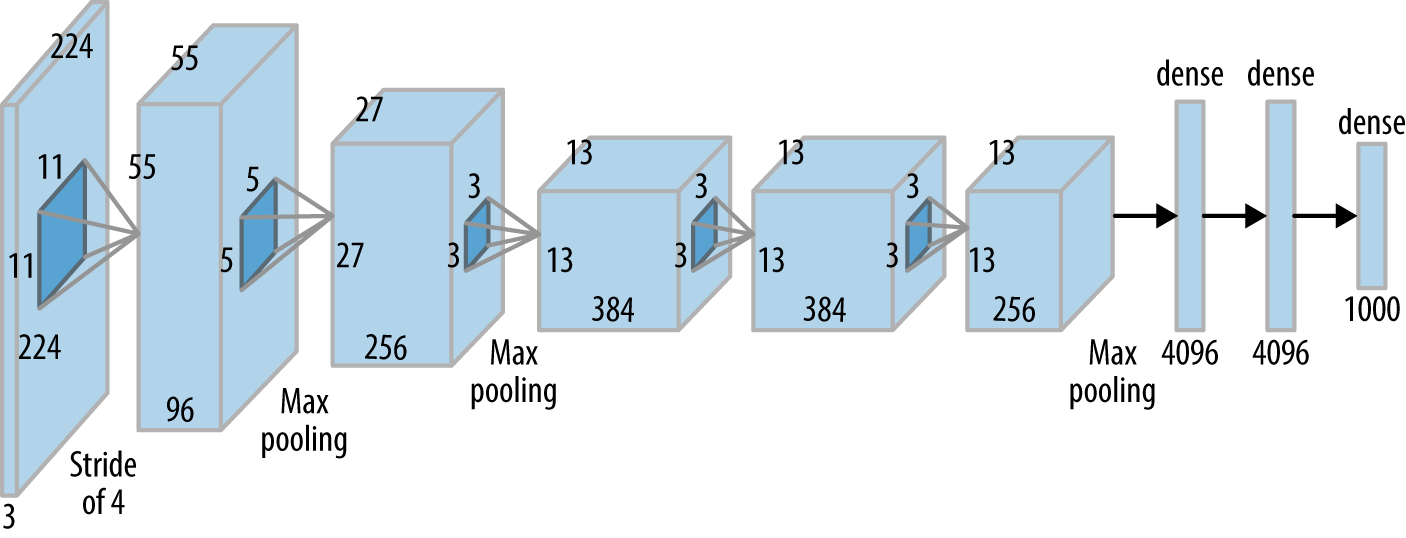

In [ ]:
NUM_CLASSES = 10
import torch.nn as nn
import torch.nn.functional as F
class AlexNet(nn.Module):
    def __init__(self, num_classes=NUM_CLASSES):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 2 * 2, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 2 * 2)
        x = self.classifier(x)
        x = x.to (device)
        return x

<h3> Alex-Net initialize the network loss and optimizer </h3>

In [ ]:
import torch.optim as optim
net = AlexNet ()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD (net.parameters(), lr=0.001, momentum=0.9)

<h3> Use available GPUs to perform training by using DataParallel package </h3>

In [ ]:
import torch.optim as optim
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
if torch.cuda.device_count() > 1:
    print("Let's use", torch.cuda.device_count(), "GPUs!")
    net = nn.DataParallel(net, device_ids = [0,1])
net.to(device)
print (device)

<h3> Run the training procedure for the CIFAR-10 dataset </h3>

In [ ]:
for epoch in range(15):  # loop over the dataset multiple times
# for epoch in range(200):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to (device)
        labels = labels.to (device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 0:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            running_loss = 0.0

print('Finished Training')

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to (device)
        labels = labels.to (device)
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        if (total < 10):
            print (outputs, ' ', predicted, ' ', labels)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print (correct)
print (total)
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to (device)
        labels = labels.to (device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

In [ ]:
import torchvision.models as models
resnet18 = models.resnet18()
alexnet = models.alexnet()
vgg16 = models.vgg16()
squeezenet = models.squeezenet1_0()
densenet = models.densenet161()
inception = models.inception_v3()
googlenet = models.googlenet()
shufflenet = models.shufflenet_v2_x1_0()
mobilenet_v2 = models.mobilenet_v2()
mobilenet_v3_large = models.mobilenet_v3_large()
mobilenet_v3_small = models.mobilenet_v3_small()
resnext50_32x4d = models.resnext50_32x4d()
wide_resnet50_2 = models.wide_resnet50_2()
mnasnet = models.mnasnet1_0()

<h1> Tasks for the lab </h1>

<h3> 1. Train the Alex-Net neural network with the use of Adam optimizer. Number of epochs should be 200, batch size - 256. Provide code for calculating accuracy values and the training loop for the given network in the box below. </h3>

In [ ]:
epochs = 20
#epochs = 200
batch_size = 256

In [ ]:
#from ipywidgets import IProgress
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
 
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
 
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
 
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
NUM_CLASSES = len(classes)
print('NUM_CLASSES:', NUM_CLASSES)

import torch.nn as nn
import torch.nn.functional as F
class AlexNet(nn.Module):
    def __init__(self, num_classes=NUM_CLASSES):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 2 * 2, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 2 * 2)
        x = self.classifier(x)
        x = x.to (device)
        return x

In [ ]:
# Init Class AlexNet
import torch.optim as optim
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print (device)

net = AlexNet()
net.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [ ]:
# Train AlexNet model
import time

start = time.time()

print('Start traning.')
for epoch in range(epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 0:    # print every 50 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            running_loss = 0.0

print('Finished Training')
training_time_task_1 = time.time() - start
print('Training time Task-1:', training_time_task_1)

<h3> Calculate accuracy and other metrics </h3>

In [ ]:
correct = 0
total = 0

# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.cuda(), labels.cuda()
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy_total_task_1 = 100 * correct / total
print('Accuracy of the network on the %d test images: %d %%' % (total, accuracy_total_task_1))

<h3> Calculate accuracy for each class separately </h3>

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.cuda(), labels.cuda()
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


accuracy_class_task_1 = {}
# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname, accuracy))
    accuracy_class_task_1[classname] = accuracy

In [ ]:
print('Training time task-1:', training_time_task_1)
print('Accuracy of the network:', accuracy_total_task_1)
print('Accuracy for class (%):', accuracy_class_task_1)

<h3> 2. Train the Alex-Net will the following changes:
    </h3>
    <ul>
        <li>Add Normalization of mean=[0.485, 0.456, 0.406] and std=[0.229, 0.224, 0.225]</li>
        <li>Choose a random subset of 8 classes for the training/testing. </li>
        <li>Calculate the accurary and a confusion matrix for the given 8 classes</li>
    </ul>
    

In [ ]:
import random
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

epochs = 20
#epochs = 200
batch_size = 256
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                  std=[0.229, 0.224, 0.225])
transform = transforms.Compose([transforms.ToTensor(), normalize])
picked_classes_idx = random.sample(range(0, 10), 8)
print('a random subset of 8 classes idx:', picked_classes_idx)

In [ ]:
# Return only images of certain class (eg. aeroplanes = class 0)
def get_idx(v_dataset_label, v_picked_classes_idx):
    return [v_dataset_label[i] for i in range(len(v_dataset_label)) if v_dataset_label[i] in v_picked_classes_idx]

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
#Load TrainSet
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

dataiter = iter(trainloader)
images, labels = dataiter.next()

train_indices=get_idx(labels, picked_classes_idx)
current_train_set = torch.utils.data.Subset(trainset, train_indices)
current_train_trainloader = torch.utils.data.DataLoader(current_train_set, batch_size=batch_size, shuffle=True, num_workers=2)
dataiter = iter(current_train_trainloader)
current_train_images, current_train_labels = dataiter.next()

f = plt.figure (figsize = (16,16))
# show images
imshow(torchvision.utils.make_grid(current_train_images))
# print labels
print('Current_train_labels:', ' '.join('%5s' % classes[current_train_labels[j]] for j in range(len(current_train_labels))))

In [ ]:
NUM_CLASSES = len(classes)
print('NUM_CLASSES:', NUM_CLASSES)

import torch.nn as nn
import torch.nn.functional as F
class AlexNet(nn.Module):
    def __init__(self, num_classes=NUM_CLASSES):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 2 * 2, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 2 * 2)
        x = self.classifier(x)
        x = x.to(device)
        return x

In [ ]:
# Init Class AlexNet
import torch.optim as optim
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print (device)

net_t2 = AlexNet()
net_t2.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net_t2.parameters(), lr=0.001)

In [ ]:
import time

start = time.time()

print('Start traning.')
for epoch in range(epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(current_train_trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net_t2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 50 == 0:    # print every 50 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            running_loss = 0.0

print('Finished Training')
training_time_task_2 = time.time() - start
print('Training time task-2:', training_time_task_2)

In [ ]:
# Load TestSet
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

dataiter = iter(testloader)
images, labels = dataiter.next()

test_indices=get_idx(labels, picked_classes_idx)
current_test_set = torch.utils.data.Subset(trainset, train_indices)
current_test_loader = torch.utils.data.DataLoader(current_test_set, batch_size=batch_size, shuffle=True, num_workers=2)
dataiter = iter(current_test_loader)
current_test_images, current_test_labels = dataiter.next()

f = plt.figure (figsize = (16,16))
# print images
imshow(torchvision.utils.make_grid(current_test_images))
print('GroundTruth: ', ' '.join('%5s' % classes[current_test_labels[j]] for j in range(len(current_test_labels))))

<h3> Calculate accuracy and other metrics </h3>

In [ ]:
correct = 0
total = 0
predicted_current_test = []

# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in current_test_loader:
        images, labels = data
        images, labels = images.cuda(), labels.cuda()
        # calculate outputs by running images through the network
        outputs = net_t2(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        print(predicted)
        predicted_current_test = predicted
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
accuracy_total_task_2 = 100 * correct / total
print('Accuracy of the network on the %d test images: %d %%' % (total, accuracy_total_task_2))

In [ ]:
print(predicted_current_test)

<h3> Calculate accuracy for each class separately </h3>

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in current_test_loader:
        images, labels = data
        images, labels = images.cuda(), labels.cuda()
        outputs = net_t2(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

accuracy_class_task_2 = {}
# print accuracy for each class
for classname, correct_count in correct_pred.items():
    if total_pred[classname] == 0:
        accuracy = 0
    else:
        accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname, accuracy))
    accuracy_class_task_2[classname] = accuracy
    

In [ ]:
print('Training time task-2', training_time_task_2)
print('Accuracy of the network:', accuracy_total_task_2)
print('Accuracy for class (%):', accuracy_class_task_2)

In [ ]:
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix
print("Confusion Matrix : ")
# print(np.array(current_test_labels))
# print(predicted_current_test[0].cpu().numpy())
confusion_matrix(np.array(current_test_labels), predicted_current_test.cpu().numpy())

<h3> 3. From the torchvision module import models and compare performances of VGG-16, resnet-18 and Alex-Net on a CIFAR-10 dataset </h3>

In [ ]:
import torchvision.models as models
import torchvision.transforms as transforms

vgg16 = models.vgg16()
resnet18 = models.resnet18()
alexnet = models.alexnet()

epochs = 2
#epochs = 200
# batch_size = 256
batch_size = 8
num_classes = 10
data_dir = "./data"
learning_rate = 0.001

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print (device)

vgg16.to(device)
resnet18.to(device)
alexnet.to(device)

criterion_vgg16 = nn.CrossEntropyLoss()
criterion_resnet18 = nn.CrossEntropyLoss()
criterion_alexnet = nn.CrossEntropyLoss()

# optimizer_vgg16 =    optim.Adam(vgg16.parameters(), lr=learning_rate)
# optimizer_resnet18 = optim.Adam(resnet18.parameters(), lr=learning_rate)
# optimizer_alexnet =  optim.Adam(alexnet.parameters(), lr=learning_rate)

optimizer_vgg16 =    optim.SGD(vgg16.parameters(), lr=learning_rate, momentum=0.9)
optimizer_resnet18 = optim.SGD(resnet18.parameters(), lr=learning_rate, momentum=0.9)
optimizer_alexnet =  optim.SGD(alexnet.parameters(), lr=learning_rate, momentum=0.9)

In [ ]:
#Load TrainSet
import torchvision
import torchvision.transforms as transforms

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                  std=[0.229, 0.224, 0.225])
# transform = transforms.Compose([transforms.ToTensor(), normalize])

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize,
])

train_set = torchvision.datasets.CIFAR10(root=data_dir, train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
len(train_set)

In [ ]:
# Show loaded images
import numpy as np
import matplotlib.pyplot as plt

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

#Get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

f = plt.figure (figsize = (16,16))
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print('Current_train_labels:', ' '.join('%5s' % classes[labels[j]] for j in range(len(labels))))

In [ ]:
import time
import gc
gc.collect()
torch.cuda.empty_cache()

start = time.time()

print('Start traning.')
for epoch in range(epochs):  # loop over the dataset multiple times
    running_loss_vgg16, running_loss_resnet18, running_loss_alexnet = 0.0, 0.0, 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()

        # zero the parameter gradients
        optimizer_vgg16.zero_grad()
        optimizer_resnet18.zero_grad()
        optimizer_alexnet.zero_grad()

        # forward + backward + optimize
        outputs_vgg16 = vgg16(inputs)
        loss_vgg16 = criterion_vgg16(outputs_vgg16, labels)
        loss_vgg16.backward()
        optimizer_vgg16.step()
        
        outputs_resnet18 = resnet18(inputs)
        loss_resnet18 = criterion_resnet18(outputs_resnet18, labels)
        loss_resnet18.backward()
        optimizer_resnet18.step()
        
        outputs_alexnet = alexnet(inputs)
        loss_alexnet =  criterion_alexnet(outputs_alexnet, labels)
        loss_alexnet.backward()
        optimizer_alexnet.step()

#         print statistics
        running_loss_vgg16 += loss_vgg16.item()
        running_loss_resnet18 += loss_resnet18.item()
        running_loss_alexnet += loss_alexnet.item()
        if i % 2000 == 0:    # print every 2000 mini-batches
            print('[%d, %5d] loss vgg16/resnet18/alexnet: %.3f %.3f %.3f'%
                  (epoch + 1, i + 1, running_loss_vgg16 / 2000, running_loss_resnet18 / 2000, running_loss_alexnet / 2000))
            running_loss_vgg16, running_loss_resnet18, running_loss_alexnet = 0.0, 0.0, 0.0

print('Finished Training')
training_time_task_3 = time.time() - start
print('Training time task-3:', training_time_task_3)

In [ ]:
# import time
import gc
gc.collect()
torch.cuda.empty_cache()

start = time.time()

print('Start traning.')
for epoch in range(epochs):  # loop over the dataset multiple times
    running_loss_vgg16, running_loss_resnet18, running_loss_alexnet = 0.0, 0.0, 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()

        # zero the parameter gradients
#         optimizer_vgg16.zero_grad()
#         optimizer_resnet18.zero_grad()
        optimizer_alexnet.zero_grad()

        # forward + backward + optimize
#         outputs_vgg16 = vgg16(inputs)
#         loss_vgg16 = criterion_vgg16(outputs_vgg16, labels)
#         loss_vgg16.backward()
#         optimizer_vgg16.step()
        
#         outputs_resnet18 = resnet18(inputs)
#         loss_resnet18 = criterion_resnet18(outputs_resnet18, labels)
#         loss_resnet18.backward()
#         optimizer_resnet18.step()
        
        outputs_alexnet = alexnet(inputs)
        loss_alexnet =  criterion_alexnet(outputs_alexnet, labels)
        loss_alexnet.backward()
        optimizer_alexnet.step()

#         print statistics
#         running_loss_vgg16 += loss_vgg16.item()
#         running_loss_resnet18 += loss_resnet18.item()
        running_loss_alexnet += loss_alexnet.item()
        if i % 50 == 0:    # print every 50 mini-batches
            print('[%d, %5d] loss vgg16/resnet18/alexnet: %.3f %.3f %.3f'%
                  (epoch + 1, i + 1, running_loss_vgg16 / 50, running_loss_resnet18 / 50, running_loss_alexnet / 50))
            running_loss_vgg16, running_loss_resnet18, running_loss_alexnet = 0.0, 0.0, 0.0

print('Finished Training')
training_time_task_3 = time.time() - start
print('Training time task-3:', training_time_task_3)

In [ ]:
# Load TestSet
test_set = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)

In [ ]:
correct_vgg16, correct_resnet18, correct_alexnet = 0, 0, 0
total = 0
predicted_test_vgg16 = []
predicted_test_resnet18 = []
predicted_test_alexnet = []

correct_pred_vgg16 = {classname: 0 for classname in classes}
total_pred_vgg16   = {classname: 0 for classname in classes}

correct_pred_resnet18 = {classname: 0 for classname in classes}
total_pred_resnet18   = {classname: 0 for classname in classes}

correct_pred_alexnet = {classname: 0 for classname in classes}
total_pred_alexnet   = {classname: 0 for classname in classes}

# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.cuda(), labels.cuda()
        
        # calculate outputs by running images through the network
        outputs_vgg16 = vgg16(images)
        loss_vgg16 = criterion_vgg16(outputs_vgg16, labels)
        
        outputs_resnet18 = resnet18(images)
        loss_resnet18 = criterion_resnet18(outputs_resnet18, labels)
        
        outputs_alexnet = alexnet(images)
        loss_alexnet = criterion_alexnet(outputs_alexnet, labels)
        
        # the class with the highest energy is what we choose as prediction
        _, predicted_vgg16 = torch.max(outputs_vgg16.data, 1)
        _, predicted_resnet18 = torch.max(outputs_resnet18.data, 1)
        _, predicted_alexnet = torch.max(outputs_alexnet.data, 1)
        
        
#         print(predicted_vgg16, predicted_resnet18, predicted_alexnet)
        
#         predicted_test_vgg16.append(predicted_vgg16)
#         predicted_test_resnet18.append(predicted_resnet18)
#         predicted_test_alexnet.append(predicted_alexnet)
        
        total += labels.size(0)
        
        correct_vgg16    += (predicted_vgg16 == labels).sum().item()
        correct_resnet18 += (predicted_resnet18 == labels).sum().item()
        correct_alexnet  += (predicted_alexnet == labels).sum().item()
        
        
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predicted_vgg16):
            if label == prediction:
                correct_pred_vgg16[classes[label]] += 1
            total_pred_vgg16[classes[label]] += 1

        for label, prediction in zip(labels, predicted_resnet18):
            if label == prediction:
                correct_pred_resnet18[classes[label]] += 1
            total_pred_resnet18[classes[label]] += 1

        for label, prediction in zip(labels, predicted_alexnet):
            if label == prediction:
                correct_pred_alexnet[classes[label]] += 1
            total_pred_alexnet[classes[label]] += 1
        
        print('.', end='')
        
accuracy_total_vgg16    = 100 * correct_vgg16 / total
accuracy_total_resnet18 = 100 * correct_resnet18 / total
accuracy_total_alexnet  = 100 * correct_alexnet / total

print()
print('Accuracy of the vgg16 network on the %d test images: %d %%' % (total, accuracy_total_vgg16))
print('Accuracy of the resnet18 network on the %d test images: %d %%' % (total, accuracy_total_resnet18))
print('Accuracy of the alexnet network on the %d test images: %d %%' % (total, accuracy_total_alexnet))
print()
for classname, correct_count in correct_pred_alexnet.items():
    if total_pred_alexnet[classname] == 0:
        accuracy = 0
    else:
        accuracy = 100 * float(correct_count) / total_pred_alexnet[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname, accuracy))


In [ ]:
# print(predicted_test_vgg16)
# print(predicted_test_resnet18)
# print(predicted_test_alexnet)

<h3> Calculate accuracy for each class separately </h3>

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in current_test_loader:
        images, labels = data
        images, labels = images.cuda(), labels.cuda()
        outputs = net_t2(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1

accuracy_class_task_2 = {}
# print accuracy for each class
for classname, correct_count in correct_pred.items():
    if total_pred[classname] == 0:
        accuracy = 0
    else:
        accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname, accuracy))
    accuracy_class_task_3[classname] = accuracy
    

In [ ]:
print('Training time task-3', training_time_task_3)
print('Accuracy of the network:', accuracy_total_task_3)
print('Accuracy for class (%):', accuracy_class_task_3)